# Underfit and Overfit

## The data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("mm.mplstyle")

In [2]:
x = np.array([0.55, 1.2, 2, 4, 6.5, 12, 16])
y = np.array([0.13, 0.64, 5.8, 102, 210, 2030, 3900])

## Ploting the data

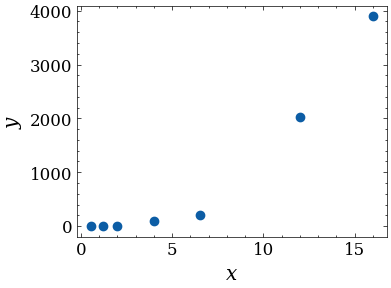

In [3]:
plt.scatter(x, y, marker="o")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Fit the data with different orders of polynomial

In [4]:
x_train = x
y_train = y
order = 6
coeffs = np.polyfit(x_train, y_train, deg=order)
coeffs

array([-1.38372623e-02,  5.08424667e-01, -6.43792386e+00,  3.48573100e+01,
       -7.39915535e+01,  6.43127904e+01, -1.80950697e+01])

In [5]:
def predict(coeffs, x_eval):
    deg = len(coeffs) - 1
    y_eval = np.zeros(len(x_eval))
    for i in range(deg + 1):
        y_eval += x_eval ** (deg-i) * coeffs[i]
    return y_eval

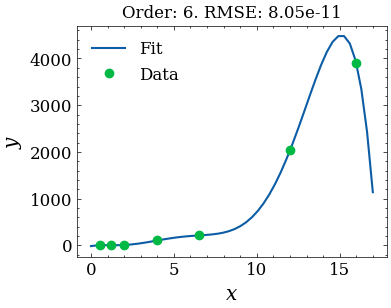

In [6]:
x_eval = np.linspace(0, 17)
y_eval = predict(coeffs, x_eval)
error = np.sqrt(np.mean((predict(coeffs, x_train) - y_train) ** 2))

plt.plot(x_eval, y_eval, label="Fit")
plt.plot(x_train, y_train, marker="o", linestyle="", label="Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title(f"Order: {order}. RMSE: {error:.3g}")
plt.show()

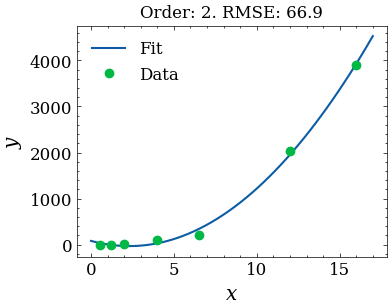

In [7]:
order = 2
coeffs = np.polyfit(x_train, y_train, deg=order)
x_eval = np.linspace(0, 17)
y_eval = predict(coeffs, x_eval)
error = np.sqrt(np.mean((predict(coeffs, x_train) - y_train) ** 2))

plt.plot(x_eval, y_eval, label="Fit")
plt.plot(x_train, y_train, marker="o", linestyle="", label="Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title(f"Order: {order}. RMSE: {error:.3g}")
plt.show()

Problems
- Which order do you think is the best? Why?

## Using validation set

In [8]:
train_mask = np.array([True, False, True, True, True, False, True])

x_train = x[train_mask]
y_train = y[train_mask]

x_valid = x[~train_mask]
y_valid = y[~train_mask]

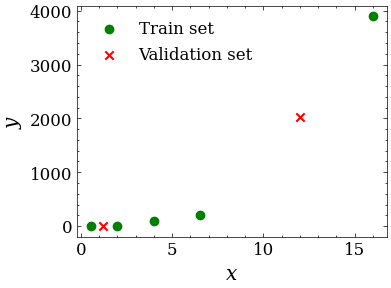

In [9]:
plt.scatter(x_train, y_train, marker="o", label="Train set", color="green")
plt.scatter(x_valid, y_valid, marker="x", label="Validation set", color="red")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

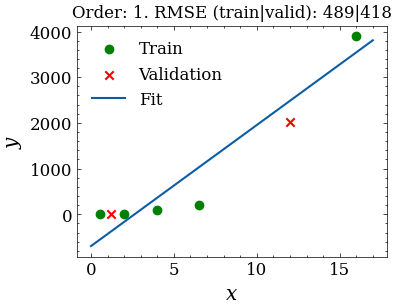

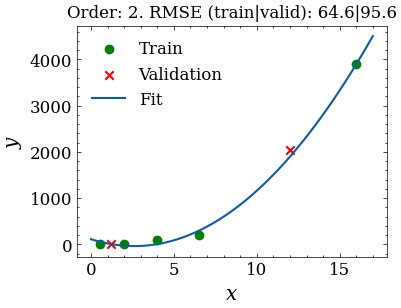

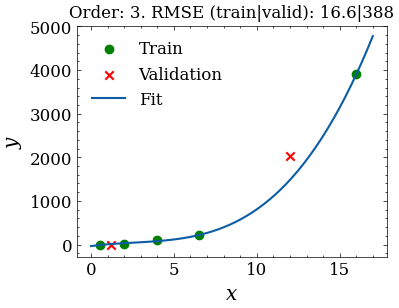

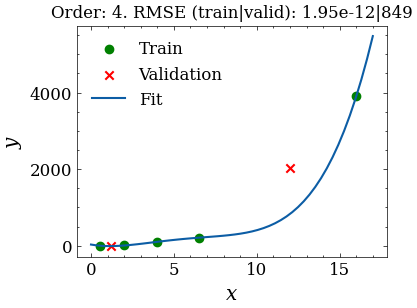

In [10]:
x_eval = np.linspace(0, 17)
error_train_list = []
error_valid_list = []
order_list = [1, 2, 3, 4]
for order in order_list:
    plt.scatter(x_train, y_train, marker="o", label="Train", color="green")
    plt.scatter(x_valid, y_valid, marker="x", label="Validation", color="red")
    coeffs = np.polyfit(x_train, y_train, deg=order)
    y_eval = predict(coeffs, x_eval)
    error_train = np.sqrt(np.mean((predict(coeffs, x_train) - y_train) ** 2))
    error_valid = np.sqrt(np.mean((predict(coeffs, x_valid) - y_valid) ** 2))
    
    error_train_list.append(error_train)
    error_valid_list.append(error_valid)
    
    plt.plot(x_eval, y_eval, label="Fit")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.title(f"Order: {order}. RMSE (train|valid): {error_train:.3g}|{error_valid:.3g}")
    plt.show()

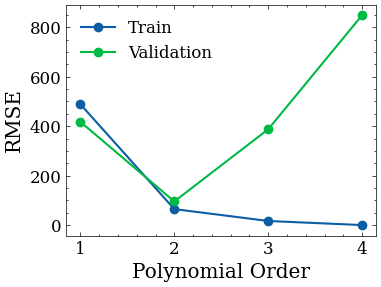

In [11]:
plt.plot(order_list, error_train_list, marker="o", label="Train")
plt.plot(order_list, error_valid_list, marker="o", label="Validation")
plt.xlabel("Polynomial Order")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Problems
- How to use the test set?
- If we must use a high-order polynomial, what can we do to reduce the overfitting problem?
